In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras import regularizers
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Dataset
-> Load Data
-> Understand the dataset


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Fall 2020/Knowledge Discovery/Project/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(df.shape)
print(df.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Outlier Detection using histogram

Here you can see there are less number of outliers in each column. Take for example V1 column---> we could see huge bar on 0 but with -20 there are less people!
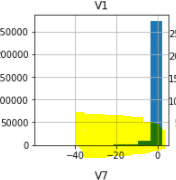



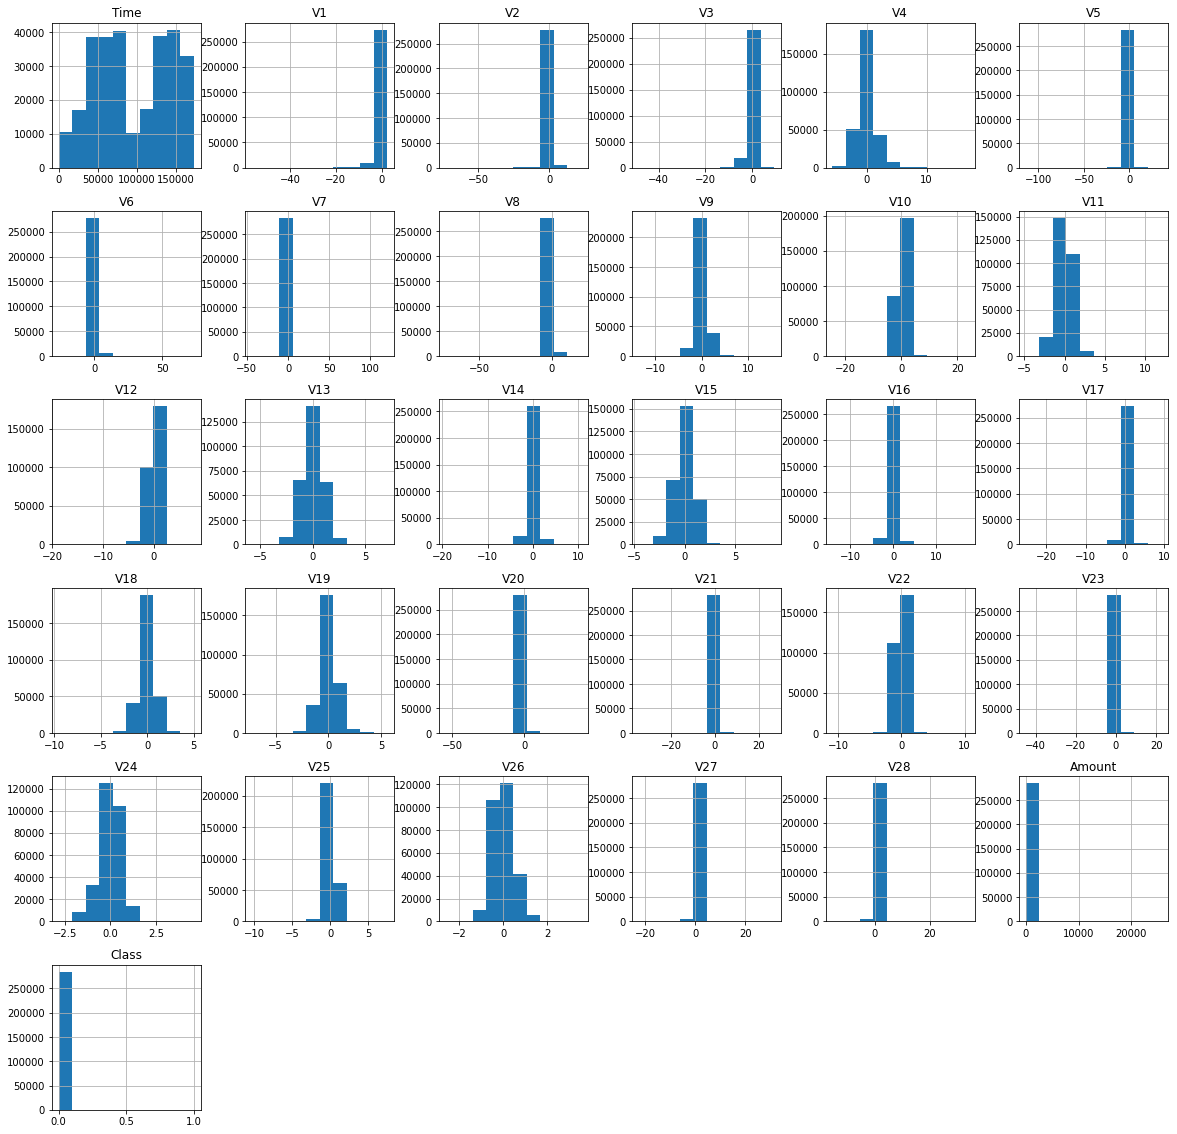

In [7]:
df.hist(figsize=(20,20))
plt.show()

# Understanding the Last Column i.e Class

With bar plot we can see there are less fraduant cases in our dataset



0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


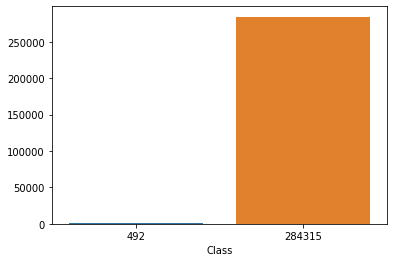

In [8]:
output_column= df.Class.value_counts()
sns.barplot(x=output_column.index, y=output_column.values, data=output_column)
print(output_column)
print(output_column/output_column.sum())

# Split the dataset into train and test

In [9]:
# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
data = df.drop("Class", axis=1)
output= df["Class"]
X_train, X_test, y_train, y_test = train_test_split(data,output, test_size=0.25, random_state=27)

In [11]:
y_train.value_counts()

0    213245
1       360
Name: Class, dtype: int64

# OverSampling using SMOTE technique

In [12]:

oversample = SMOTE(k_neighbors=3,ratio=0.7)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# SVM

In [13]:
model_SVM= SVC(C=5.0,kernel='rbf')
model_SVM.fit(X_smote,y_smote)
y_pred = model_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.992%


In [14]:
# confusion_matrix
print(confusion_matrix(y_test,y_pred))
# classification_report
print(classification_report(y_test, y_pred))

[[70556   514]
 [   21   111]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71070
           1       0.18      0.84      0.29       132

    accuracy                           0.99     71202
   macro avg       0.59      0.92      0.64     71202
weighted avg       1.00      0.99      0.99     71202



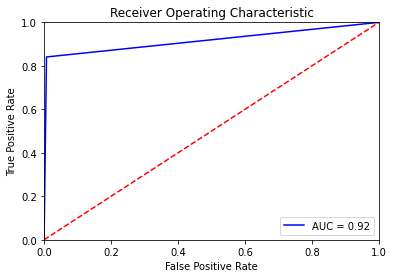

In [15]:
import sklearn.metrics as metrics
fpr_s, tpr_s, thresholds_s = metrics.roc_curve(y_test, y_pred)
roc_auc_svm = metrics.auc(fpr_s, tpr_s)
plt.title('Receiver Operating Characteristic')
svm=plt.plot(fpr_s, tpr_s, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# KNN

In [ ]:

model_LR = KNeighborsClassifier(n_neighbors=8)
model_LR.fit(X_smote,y_smote)
y_pred = model_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))
# confusion_matrix
print(confusion_matrix(y_test,y_pred))
# classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.998%
[[70963   107]
 [   18   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.52      0.86      0.65       132

    accuracy                           1.00     71202
   macro avg       0.76      0.93      0.82     71202
weighted avg       1.00      1.00      1.00     71202



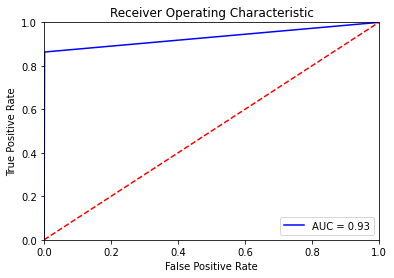

In [ ]:
import sklearn.metrics as metrics
fpr_lrr, tpr_lrr, thresholds_lrr = metrics.roc_curve(y_test, y_pred)
roc_auc_lrr = metrics.auc(fpr_lrr, tpr_lrr)
plt.title('Receiver Operating Characteristic')
lrr=plt.plot(fpr_lrr, tpr_lrr, 'b', label = 'AUC = %0.2f' % roc_auc_lrr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Random Forest

In [20]:
model_rdc=RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             max_depth=10,
                             max_features=8,
                             min_samples_leaf=1,
                             bootstrap=True)
model_rdc.fit(X_smote,y_smote)
pred=model_rdc.predict(X_test)
print(classification_report(pred,y_test))
print('\n')
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71022
           1       0.83      0.61      0.71       180

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.85     71202
weighted avg       1.00      1.00      1.00     71202



[[71000    22]
 [   70   110]]


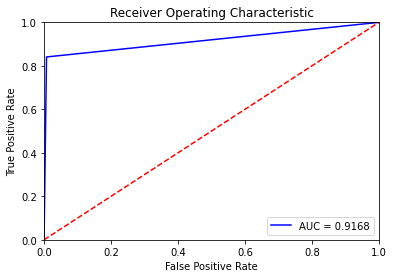

In [21]:
import sklearn.metrics as metrics
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_pred)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.4f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Bernoulli Naive Bayes

In [ ]:

Model = BernoulliNB()
Model.fit(X_smote,y_smote)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71070
           1       0.21      0.82      0.33       132

    accuracy                           0.99     71202
   macro avg       0.60      0.91      0.66     71202
weighted avg       1.00      0.99      1.00     71202

[[70653   417]
 [   24   108]]
accuracy is 0.9938063537541081


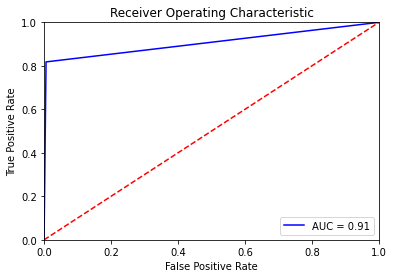

In [ ]:
import sklearn.metrics as metrics
fpr_bn, tpr_bn, thresholds_bn = metrics.roc_curve(y_test, y_pred)
roc_auc_bn = metrics.auc(fpr_bn, tpr_bn)
plt.title('Receiver Operating Characteristic')
bn=plt.plot(fpr_bn, tpr_bn, 'b', label = 'AUC = %0.2f' % roc_auc_bn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Linear Discriminant Analysis

In [ ]:

Model = LinearDiscriminantAnalysis()
Model.fit(X_smote,y_smote)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71070
           1       0.15      0.78      0.25       132

    accuracy                           0.99     71202
   macro avg       0.58      0.89      0.63     71202
weighted avg       1.00      0.99      0.99     71202

[[70495   575]
 [   29   103]]
accuracy is 0.9915170922165107


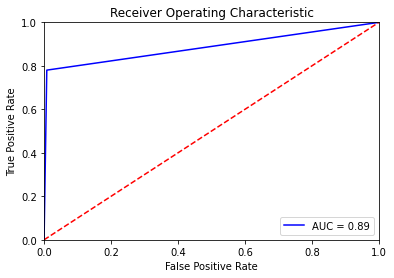

In [ ]:
import sklearn.metrics as metrics
fpr_lda, tpr_lda, thresholds_lda = metrics.roc_curve(y_test, y_pred)
roc_auc_lda = metrics.auc(fpr_lda, tpr_lda)
plt.title('Receiver Operating Characteristic')
lda=plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc_lda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#MLP

In [22]:

Model=MLPClassifier(hidden_layer_sizes=50,alpha=0.001,batch_size=64)
Model.fit(X_smote,y_smote)
y_pred=Model.predict(X_test)
# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.65      0.84      0.74       132

    accuracy                           1.00     71202
   macro avg       0.83      0.92      0.87     71202
weighted avg       1.00      1.00      1.00     71202

[[71011    59]
 [   21   111]]
accuracy is  0.998876436055167


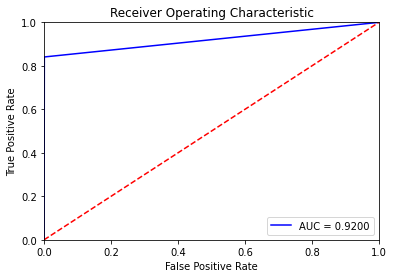

In [23]:
import sklearn.metrics as metrics
fpr_mlp, tpr_mlp, thresholds_mlp = metrics.roc_curve(y_test, y_pred)
roc_auc_mlp = metrics.auc(fpr_mlp, tpr_mlp)
plt.title('Receiver Operating Characteristic')
mlp=plt.plot(fpr_mlp, tpr_mlp, 'b', label = 'AUC = %0.4f' % roc_auc_mlp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Gradient Boosting

In [24]:
## Gradient Boosting Machine
Model = GradientBoostingClassifier(n_estimators=100, random_state=9)
Model.fit(X_smote,y_smote)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71070
           1       0.21      0.88      0.34       132

    accuracy                           0.99     71202
   macro avg       0.61      0.94      0.67     71202
weighted avg       1.00      0.99      1.00     71202

[[70641   429]
 [   16   116]]
accuracy is 0.9937501755568664


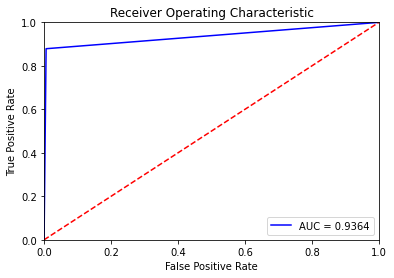

In [26]:
import sklearn.metrics as metrics
fpr_boost, tpr_boost, thresholds_boost = metrics.roc_curve(y_test, y_pred)
roc_auc_boost = metrics.auc(fpr_boost, tpr_boost)
plt.title('Receiver Operating Characteristic')
boost=plt.plot(fpr_boost, tpr_boost, 'b', label = 'AUC = %0.4f' % roc_auc_boost)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Autoencoder

In [ ]:
from keras.models import Model
input_size = X_smote.shape[1]
encoding_size = 500
input_layer = Input(shape=(input_size, ))

encoder_1 = Dense(encoding_size, activation="relu")(input_layer)
encoder_2 = Dense(int(encoding_size / 2), activation="relu")(encoder_1)
decoder_1 = Dense(encoding_size, activation='relu')(encoder_2)
decoder_2=Dropout(0.2)(decoder_1)
output_layer = Dense(input_size, activation='relu')(decoder_2)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [ ]:

autoencoder.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

tensorboard = TensorBoard(log_dir='./logs', write_images=True)

history = autoencoder.fit(X_smote, X_smote, epochs=10, batch_size=8, shuffle=True, validation_data=(X_test, X_test),
                  callbacks=[tensorboard]).history

Epoch 1/10
45315/45315 [==============================] - 187s 4ms/step - loss: 9.2748 - accuracy: 0.8593 - val_loss: 0.6145 - val_accuracy: 0.8761
Epoch 2/10
45315/45315 [==============================] - 198s 4ms/step - loss: 9.2209 - accuracy: 0.8787 - val_loss: 0.6059 - val_accuracy: 0.8822
Epoch 3/10
45315/45315 [==============================] - 186s 4ms/step - loss: 9.2162 - accuracy: 0.8844 - val_loss: 0.6024 - val_accuracy: 0.8791
Epoch 4/10
45315/45315 [==============================] - 197s 4ms/step - loss: 9.2134 - accuracy: 0.8889 - val_loss: 0.6102 - val_accuracy: 0.8729
Epoch 5/10
45315/45315 [==============================] - 185s 4ms/step - loss: 9.2108 - accuracy: 0.8893 - val_loss: 0.5991 - val_accuracy: 0.8959
Epoch 6/10
45315/45315 [==============================] - 184s 4ms/step - loss: 9.2078 - accuracy: 0.8918 - val_loss: 0.6024 - val_accuracy: 0.8942
Epoch 7/10
45315/45315 [==============================] - 180s 4ms/step - loss: 9.2070 - accuracy: 0.8911 - val_

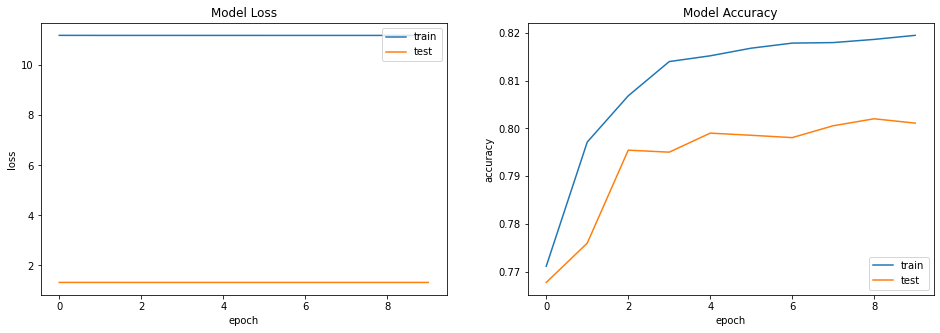

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

plt.subplot(1,2,2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.show()

In [ ]:
prediction = autoencoder.predict(X_test)
import numpy as np

mse = np.mean(np.power(X_test - prediction, 2), axis=1)
error = pd.DataFrame({'reconstruction_error': mse, 'actual_class': y_test})


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = [1 if e > 3 else 0 for e in error.reconstruction_error.values]
print('Confusion Matrix\n' + str(confusion_matrix(y_test, y_pred)))

Confusion Matrix
[[69853  1217]
 [   27   105]]


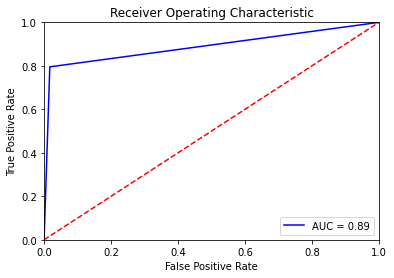

In [ ]:
import sklearn.metrics as metrics
fpr_auto, tpr_auto, thresholds_auto = metrics.roc_curve(y_test, y_pred)
roc_auc_auto= metrics.auc(fpr_auto, tpr_auto)
plt.title('Receiver Operating Characteristic')
auto=plt.plot(fpr_auto, tpr_auto, 'b', label = 'AUC = %0.2f' % roc_auc_auto)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#CNN

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data,output, test_size=0.25, random_state=27)
oversample = SMOTE(k_neighbors=3,ratio=0.7)
X_test=X_test.to_numpy()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:

X_smote=X_smote.reshape(X_smote.shape[0],X_smote.shape[1],1)
X_test=X_test
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [30]:
model=Sequential()
model.add(Conv1D(32,5,activation='relu',input_shape=X_smote[0].shape))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 26, 32)            192       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 32)            128       
_________________________________________________________________
flatten (Flatten)            (None, 832)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                26656     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 27,009
Trainable params: 26,945
Non-trainable params: 64
___________________________________________________

In [31]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_smote,y_smote,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/10
5665/5665 [==============================] - 16s 3ms/step - loss: 0.0526 - accuracy: 0.9820 - val_loss: 0.0142 - val_accuracy: 0.9964
Epoch 2/10
5665/5665 [==============================] - 16s 3ms/step - loss: 0.0300 - accuracy: 0.9915 - val_loss: 0.0202 - val_accuracy: 0.9969
Epoch 3/10
5665/5665 [==============================] - 16s 3ms/step - loss: 0.0238 - accuracy: 0.9937 - val_loss: 0.0204 - val_accuracy: 0.9967
Epoch 4/10
5665/5665 [==============================] - 16s 3ms/step - loss: 0.0208 - accuracy: 0.9948 - val_loss: 0.0194 - val_accuracy: 0.9984
Epoch 5/10
5665/5665 [==============================] - 16s 3ms/step - loss: 0.0190 - accuracy: 0.9957 - val_loss: 0.0206 - val_accuracy: 0.9976
Epoch 6/10
5665/5665 [==============================] - 17s 3ms/step - loss: 0.0184 - accuracy: 0.9959 - val_loss: 0.0214 - val_accuracy: 0.9981
Epoch 7/10
5665/5665 [==============================] - 16s 3ms/step - loss: 0.0167 - accuracy: 0.9963 - val_loss: 0.0262 - val_ac

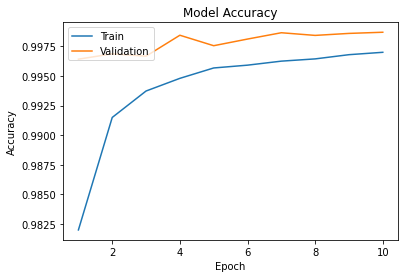

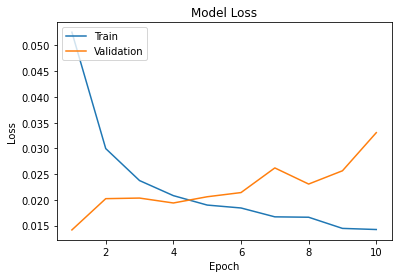

In [32]:
  epochs=10
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

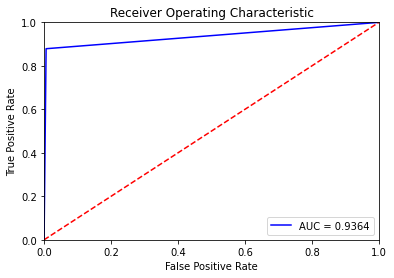

In [33]:
import sklearn.metrics as metrics
fpr_cnn, tpr_cnn, thresholds_cnn = metrics.roc_curve(y_test, y_pred)
roc_auc_cnn= metrics.auc(fpr_cnn, tpr_cnn)
plt.title('Receiver Operating Characteristic')
cnn=plt.plot(fpr_cnn, tpr_cnn, 'b', label = 'AUC = %0.4f' % roc_auc_cnn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# XGboost with Grid Search

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data,output, test_size=0.25, random_state=27)
oversample = SMOTE(k_neighbors=3,ratio=0.7)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
params={
 "learning_rate"    : [0.05,0.1, 0.3] ,
 "max_depth"        : [ 12, 15]
    
}

classifier = XGBClassifier()
grid_search= GridSearchCV(estimator = classifier,param_grid=params,scoring='f1',n_jobs=-1,cv=5)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
start_time = timer(None) 
start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(X_smote,y_smote)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 1 hours 59 minutes and 7.31 seconds.


In [ ]:
grid_search.best_estimator_
accuracy = grid_search.best_score_
accuracy

0.999778975024161

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
grid=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
grid.fit(X_smote,y_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
y_pred = grid.predict(X_test.values)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on X_test set ',accuracy_score(y_test, y_pred))

[[71056    14]
 [   22   110]]
Accuracy on X_test set  0.9994943962248252


In [42]:
print('Classification report on X_test set\n',classification_report(y_test,y_pred))

Classification report on X_test set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.89      0.83      0.86       132

    accuracy                           1.00     71202
   macro avg       0.94      0.92      0.93     71202
weighted avg       1.00      1.00      1.00     71202



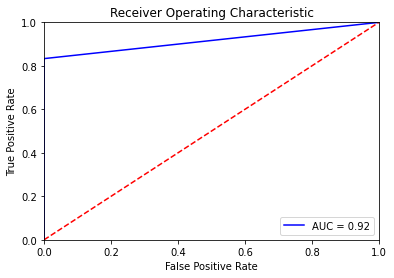

In [43]:
import sklearn.metrics as metrics
fpr_xgrid, tpr_xgrid, thresholds_xgrid = metrics.roc_curve(y_test, y_pred)
roc_auc_xgrid= metrics.auc(fpr_xgrid, tpr_xgrid)
plt.title('Receiver Operating Characteristic')
xgrid=plt.plot(fpr_xgrid, tpr_xgrid, 'b', label = 'AUC = %0.2f' % roc_auc_xgrid)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
